In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd
# Gráficos
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
# Estandarización variables numéricas y Codificación variables categóricas
# ------------------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
# Gestión datos desbalanceados
# ------------------------------------------------------------------------------
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
# Para separar los datos en train y test
# ------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
#  Gestión de warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

# Pair programming Preprocesado

## Ana C y Ana G

En esta lección realizaremos los cambios oportunos para poder ejecutar el modelo de regresión logística.
Cuando nos enfrentamos a problemas de regresión lineal vimos que eran necesarios algunos cambios antes de poder ajustar los modelos.

En el caso de la regresión logística lo tendremos que hacer.

Estos cambios incluyen:

- **Estandarización** de las variables predictoras numéricas
- **Codificación** de las variables categóricas
- **Balanceo** de la variable respuesta

In [2]:
# cargamos el conjunto de datos que guardamos en la lección anterior
df = pd.read_pickle("../data-log/01-dataframe.pickle")
df.head()

,sex,is_smoking,education,id,age,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,F,YES,2.0,0.0,64.0,3.0,0.0,0.0,0.0,0.0,221.0,148.0,85.0,26.060925,90.0,80.0,1.0
1,F,YES,1.0,2.0,46.0,10.0,0.0,0.0,0.0,0.0,250.0,116.0,71.0,20.350000,88.0,94.0,0.0
2,F,YES,1.0,4.0,64.0,30.0,0.0,0.0,0.0,0.0,241.0,136.5,85.0,26.420000,70.0,77.0,0.0
3,M,YES,4.0,7.0,36.0,35.0,0.0,0.0,0.0,0.0,295.0,102.0,68.0,28.150000,60.0,63.0,0.0
4,F,YES,2.0,8.0,41.0,20.0,0.0,0.0,0.0,0.0,220.0,126.0,78.0,20.700000,86.0,79.0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   sex              3390 non-null   category
 1   is_smoking       3390 non-null   category
 2   education        3390 non-null   category
 3   id               3390 non-null   float64 
 4   age              3390 non-null   float64 
 5   cigsPerDay       3390 non-null   float64 
 6   BPMeds           3390 non-null   category
 7   prevalentStroke  3390 non-null   category
 8   prevalentHyp     3390 non-null   category
 9   diabetes         3390 non-null   category
 10  totChol          3390 non-null   float64 
 11  sysBP            3390 non-null   float64 
 12  diaBP            3390 non-null   float64 
 13  BMI              3390 non-null   float64 
 14  heartRate        3390 non-null   float64 
 15  glucose          3390 non-null   float64 
 16  TenYearCHD       3390 non-null   category


In [4]:
df.columns

Index(['sex', 'is_smoking', 'education', 'id', 'age', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [5]:
df=df[['id','sex','education',  'age','is_smoking' ,'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes','glucose',  'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'TenYearCHD']]
df.head()

,id,sex,education,age,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,glucose,totChol,sysBP,diaBP,BMI,heartRate,TenYearCHD
0,0.0,F,2.0,64.0,YES,3.0,0.0,0.0,0.0,0.0,80.0,221.0,148.0,85.0,26.060925,90.0,1.0
1,2.0,F,1.0,46.0,YES,10.0,0.0,0.0,0.0,0.0,94.0,250.0,116.0,71.0,20.350000,88.0,0.0
2,4.0,F,1.0,64.0,YES,30.0,0.0,0.0,0.0,0.0,77.0,241.0,136.5,85.0,26.420000,70.0,0.0
3,7.0,M,4.0,36.0,YES,35.0,0.0,0.0,0.0,0.0,63.0,295.0,102.0,68.0,28.150000,60.0,0.0
4,8.0,F,2.0,41.0,YES,20.0,0.0,0.0,0.0,0.0,79.0,220.0,126.0,78.0,20.700000,86.0,0.0


In [6]:
df_copia=df.copy()

# Estandarización

Como no hemos hecho tratamiento de outliers, vamos ahcer el RobustScaler para que nos capture lso datos dentro de nuestro rango intercuartilico.

In [7]:
# iniciamos el método para escalar

robust = RobustScaler()

In [8]:
# recordemos que la estandarización solo se hace para las variables predictoras numéricas

numericas = df.select_dtypes(include = np.number)
numericas.head()

,id,age,cigsPerDay,glucose,totChol,sysBP,diaBP,BMI,heartRate
0,0.0,64.0,3.0,80.0,221.0,148.0,85.0,26.060925,90.0
1,2.0,46.0,10.0,94.0,250.0,116.0,71.0,20.350000,88.0
2,4.0,64.0,30.0,77.0,241.0,136.5,85.0,26.420000,70.0
3,7.0,36.0,35.0,63.0,295.0,102.0,68.0,28.150000,60.0
4,8.0,41.0,20.0,79.0,220.0,126.0,78.0,20.700000,86.0


In [9]:
# Si queremos eliminar alguna columna
numericas.drop(["id"], axis = 1, inplace = True)

In [10]:
# ahora ya podemos ajustar nuestros datos.  

robust.fit(numericas)

# transformamos los datos

X_robust = robust.transform(numericas)

# por último convertiremos el array que nos devuelve en un dataframe. 

numericas_robust = pd.DataFrame(X_robust, columns = numericas.columns)
numericas_robust.head(2)

,age,cigsPerDay,glucose,totChol,sysBP,diaBP,BMI,heartRate
0,1.071429,0.15,0.153846,-0.224138,0.722222,0.193548,0.136595,1.000000
1,-0.214286,0.50,1.230769,0.275862,-0.462963,-0.709677,-1.009027,0.866667


In [11]:
# dropeamos las columnas sin estandarizar

df.drop(['age',	'cigsPerDay',	'glucose'	,'totChol',	'sysBP'	,'diaBP',	'BMI',	'heartRate'], axis = 1, inplace=True)
df.head()

,id,sex,education,is_smoking,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD
0,0.0,F,2.0,YES,0.0,0.0,0.0,0.0,1.0
1,2.0,F,1.0,YES,0.0,0.0,0.0,0.0,0.0
2,4.0,F,1.0,YES,0.0,0.0,0.0,0.0,0.0
3,7.0,M,4.0,YES,0.0,0.0,0.0,0.0,0.0
4,8.0,F,2.0,YES,0.0,0.0,0.0,0.0,0.0


In [12]:
# lo unimos al dataframe original 

df = pd.concat([df, numericas_robust], axis = 1)
# chequeamos que esta todo bien
df.head()

,id,sex,education,is_smoking,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD,age,cigsPerDay,glucose,totChol,sysBP,diaBP,BMI,heartRate
0,0.0,F,2.0,YES,0.0,0.0,0.0,0.0,1.0,1.071429,0.15,0.153846,-0.224138,0.722222,0.193548,0.136595,1.000000
1,2.0,F,1.0,YES,0.0,0.0,0.0,0.0,0.0,-0.214286,0.50,1.230769,0.275862,-0.462963,-0.709677,-1.009027,0.866667
2,4.0,F,1.0,YES,0.0,0.0,0.0,0.0,0.0,1.071429,1.50,-0.076923,0.120690,0.296296,0.193548,0.208626,-0.333333
3,7.0,M,4.0,YES,0.0,0.0,0.0,0.0,0.0,-0.928571,1.75,-1.153846,1.051724,-0.981481,-0.903226,0.555667,-1.000000
4,8.0,F,2.0,YES,0.0,0.0,0.0,0.0,0.0,-0.571429,1.00,0.076923,-0.241379,-0.092593,-0.258065,-0.938816,0.733333


-------------------------------------------------------------

Vamos a aplicar esta codificación al *dataframe* original, el objetivo, tener dos datasets: 

- Uno con las variables categóricas codificadas y las numéricas estandarizadas.

- Unos con las variables categóricas codificadas y las numéricas sin estandarizar.  


Con estos dos csv ajustaremos nuestro modelo de regresión logística para comparar que modelo es mejor y como pueden cambiar las métricas. 

---

# Codificacion con datos ESTANDARIZADOS(df) y sin ESTANDARIZAR(df_copia)

Variables con orden: sexo, habito tabaquico

In [13]:
map_sex = {"M": 0, "F": 1}
df["sex"] = df["sex"].map(map_sex)
df.head(2)

,id,sex,education,is_smoking,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD,age,cigsPerDay,glucose,totChol,sysBP,diaBP,BMI,heartRate
0,0.0,1,2.0,YES,0.0,0.0,0.0,0.0,1.0,1.071429,0.15,0.153846,-0.224138,0.722222,0.193548,0.136595,1.000000
1,2.0,1,1.0,YES,0.0,0.0,0.0,0.0,0.0,-0.214286,0.50,1.230769,0.275862,-0.462963,-0.709677,-1.009027,0.866667


In [14]:
map_sex = {"M": 0, "F": 1}
df_copia["sex"] = df_copia["sex"].map(map_sex)
df_copia.head(2)

,id,sex,education,age,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,glucose,totChol,sysBP,diaBP,BMI,heartRate,TenYearCHD
0,0.0,1,2.0,64.0,YES,3.0,0.0,0.0,0.0,0.0,80.0,221.0,148.0,85.0,26.060925,90.0,1.0
1,2.0,1,1.0,46.0,YES,10.0,0.0,0.0,0.0,0.0,94.0,250.0,116.0,71.0,20.350000,88.0,0.0


In [15]:
map_fum = {"YES": 1, "NO": 0}
df["is_smoking"] = df["is_smoking"].map(map_fum)
df.head(2)

,id,sex,education,is_smoking,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD,age,cigsPerDay,glucose,totChol,sysBP,diaBP,BMI,heartRate
0,0.0,1,2.0,1,0.0,0.0,0.0,0.0,1.0,1.071429,0.15,0.153846,-0.224138,0.722222,0.193548,0.136595,1.000000
1,2.0,1,1.0,1,0.0,0.0,0.0,0.0,0.0,-0.214286,0.50,1.230769,0.275862,-0.462963,-0.709677,-1.009027,0.866667


In [16]:
map_fum = {"YES": 1, "NO": 0}
df_copia["is_smoking"] = df_copia["is_smoking"].map(map_fum)
df_copia.head(2)

,id,sex,education,age,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,glucose,totChol,sysBP,diaBP,BMI,heartRate,TenYearCHD
0,0.0,1,2.0,64.0,1,3.0,0.0,0.0,0.0,0.0,80.0,221.0,148.0,85.0,26.060925,90.0,1.0
1,2.0,1,1.0,46.0,1,10.0,0.0,0.0,0.0,0.0,94.0,250.0,116.0,71.0,20.350000,88.0,0.0


Educacion, ya está codificada

In [17]:
df['education'].value_counts()

1.0    1392
2.0    1075
3.0     550
4.0     373
Name: education, dtype: int64

In [18]:
df_copia['education'].value_counts()

1.0    1392
2.0    1075
3.0     550
4.0     373
Name: education, dtype: int64

In [19]:
df.to_pickle('../data-log/02-df_estandarizadas_codificadas.pickle')

In [20]:
df.to_csv('../data-log/02-df_estandarizadas_codificadas.csv')

In [21]:
df_copia.to_pickle('../data-log/02-df_codifcadas_no_estandarizadas.pickle')

In [22]:
df_copia.to_csv('../data-log/02-df_codifcadas_no_estandarizadas.csv')

# Balanceo de nuestra variable respuesta

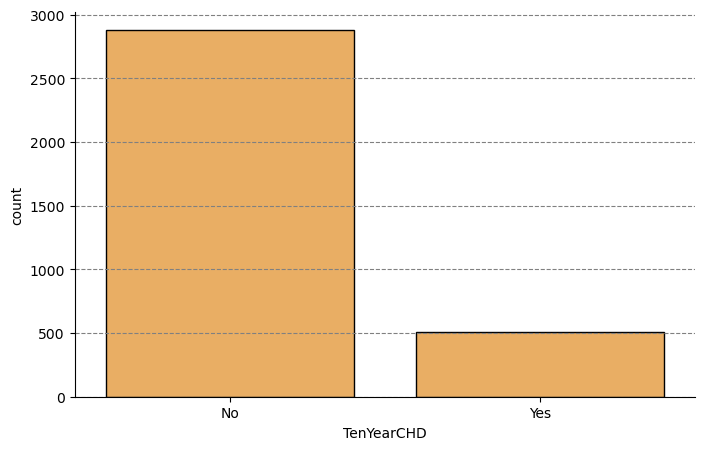

In [23]:
# recordemos como estaban distribuidos nuestros datos

plt.figure(figsize=(8,5)) # para cambiar el tamaño de la figura
ax = plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig1 = sns.countplot(data = df, x = "TenYearCHD",  color = "#ffb14e",  edgecolor='black')
plt.grid(axis = 'y', color = 'gray', linestyle = 'dashed')
fig1.set(xticklabels=["No", "Yes"]) 
plt.show()

In [24]:
df_positivo=df[(df['TenYearCHD']==1)]
df_positivo.head(2)

,id,sex,education,is_smoking,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD,age,cigsPerDay,glucose,totChol,sysBP,diaBP,BMI,heartRate
0,0.0,1,2.0,1,0.0,0.0,0.0,0.0,1.0,1.071429,0.15,0.153846,-0.224138,0.722222,0.193548,0.136595,1.000000
8,15.0,0,1.0,1,0.0,0.0,0.0,0.0,1.0,0.142857,0.75,4.153846,-0.379310,0.648148,0.451613,-0.178536,1.666667


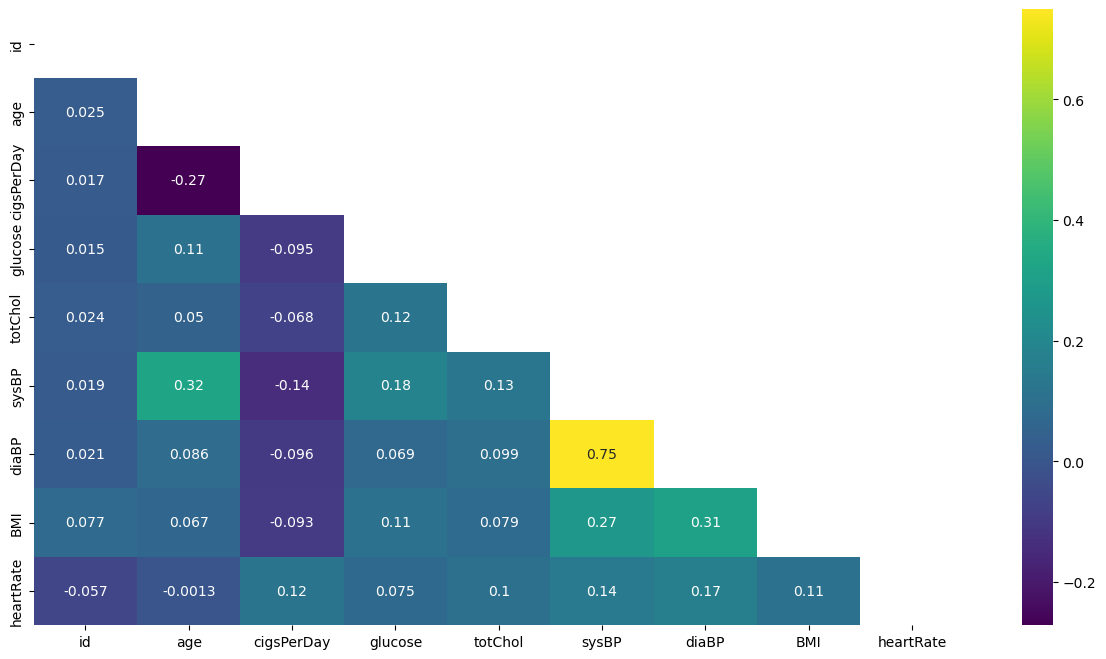

In [25]:
plt.figure(figsize=(15,8))
mask = np.triu(np.ones_like(df_positivo.corr(), dtype=bool))
sns.heatmap(df_positivo.corr(), cmap="viridis", annot = True, mask = mask); #barra lateral

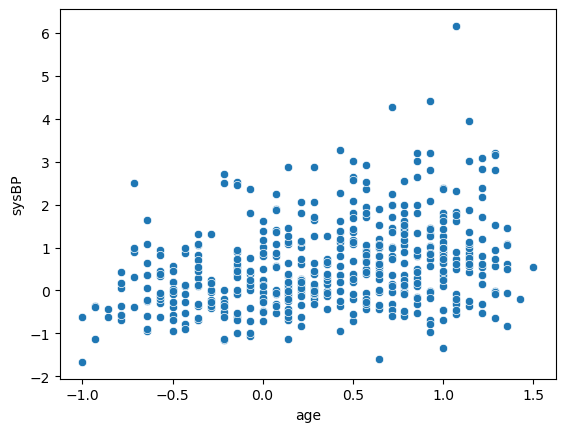

In [26]:
sns.scatterplot(x='age',y='sysBP', data=df_positivo);

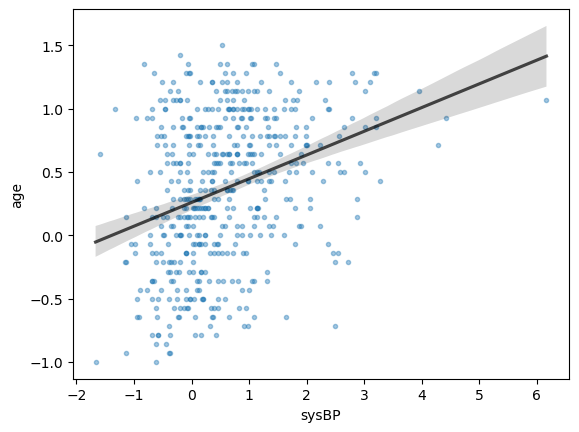

In [27]:
sns.regplot(
        y = df_positivo['age'], 
        x = df_positivo["sysBP"],  
        marker = ".", 
        scatter_kws = {"alpha": 0.4}, 
        line_kws = {"color": "black", "alpha": 0.7 });

Hemos intentado ver distrubuciones de las variables que más relacionadas están con la respuesta, buscando posibles opciones de división de datos, pero no encontramos ninguna diferencia clara. Asi que seguimos con el dataset completo para el balanceo. Vamos a balancear por Tomek en estandarizado, codificado,porque seguiremos despues con el original codificado, estandarizado, pero sin balancear.

## Downsampling, con Tomek de (SMOTE)

In [28]:
df.head()

,id,sex,education,is_smoking,BPMeds,prevalentStroke,prevalentHyp,diabetes,TenYearCHD,age,cigsPerDay,glucose,totChol,sysBP,diaBP,BMI,heartRate
0,0.0,1,2.0,1,0.0,0.0,0.0,0.0,1.0,1.071429,0.15,0.153846,-0.224138,0.722222,0.193548,0.136595,1.000000
1,2.0,1,1.0,1,0.0,0.0,0.0,0.0,0.0,-0.214286,0.50,1.230769,0.275862,-0.462963,-0.709677,-1.009027,0.866667
2,4.0,1,1.0,1,0.0,0.0,0.0,0.0,0.0,1.071429,1.50,-0.076923,0.120690,0.296296,0.193548,0.208626,-0.333333
3,7.0,0,4.0,1,0.0,0.0,0.0,0.0,0.0,-0.928571,1.75,-1.153846,1.051724,-0.981481,-0.903226,0.555667,-1.000000
4,8.0,1,2.0,1,0.0,0.0,0.0,0.0,0.0,-0.571429,1.00,0.076923,-0.241379,-0.092593,-0.258065,-0.938816,0.733333


In [29]:
df.drop('id', axis=1, inplace=True)

In [30]:
# para aplicar este método lo primero que tenemos que hacer es separar en X e y y en train y test como aprendimos en la lecciones de 
#regresion lineal
y = df['TenYearCHD']
X = df.drop('TenYearCHD', axis=1)


#dividimos en sets de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [31]:
# iniciamos el método
os_us = SMOTETomek()

# ajustamos el modelo
X_train_res, y_train_res = os_us.fit_resample(X_train, y_train)

 

In [32]:
X_train_res.head(2)

,sex,education,is_smoking,BPMeds,prevalentStroke,prevalentHyp,diabetes,age,cigsPerDay,glucose,totChol,sysBP,diaBP,BMI,heartRate
0,0,2.0,0,0.0,0.0,0.0,0.0,0.857143,0.0,0.0,0.206897,-0.166667,-0.774194,0.050150,-1.333333
1,0,1.0,1,0.0,0.0,1.0,0.0,0.000000,1.0,-1.0,0.620690,1.185185,1.580645,0.992979,0.000000


In [33]:
X_train_res.shape

(4038, 15)

In [34]:
y_train_res.head(2)

0    1.0
1    0.0
Name: TenYearCHD, dtype: category
Categories (2, float64): [0.0, 1.0]

In [35]:
y_train_res.shape

(4038,)

In [36]:
df_est_bal_cod=pd.concat([X_train_res, y_train_res],axis=1)
df_est_bal_cod.shape

(4038, 16)

In [37]:
df_est_bal_cod.to_pickle('../data-log/02-bal_est_cod.pickle')

In [38]:
df_est_bal_cod.to_csv('../data-log/02-bal_est_cod.csv')

---
El resultado es : 

In [39]:
# comprobemos como han quedado ahora las categorías después del ajuste

print (f"Distribution before resampling \n {y_train.value_counts()}" )
print("..............................................................")
print (f"Distribución after del ajuste \n {y_train_res.value_counts()}")

Distribution before resampling 
 0.0    2025
1.0     348
Name: TenYearCHD, dtype: int64
..............................................................
Distribución after del ajuste 
 0.0    2019
1.0    2019
Name: TenYearCHD, dtype: int64


## Downsampling, usando RandomUnderSample

In [40]:
# iniciamos el método

down = RandomUnderSampler()

In [41]:
# ajustamos el modelo
X_down, y_down = down.fit_resample(X,y)

---
El resultado es : 

In [42]:
# comprobemos como han quedado ahora las categorías después del ajuste

print (f"Distribution before resampling \n {y.value_counts()}" )
print("..............................................................")
print (f"Distribución after del ajuste \n {y_down.value_counts()}")

Distribution before resampling 
 0.0    2879
1.0     511
Name: TenYearCHD, dtype: int64
..............................................................
Distribución after del ajuste 
 0.0    511
1.0    511
Name: TenYearCHD, dtype: int64


### Upsampling

In [43]:
# iniciamos el método

upp = RandomOverSampler()

In [44]:
# como siempre, ajustamos el modelo

X_upp, y_upp = upp.fit_resample(X, y)

In [45]:
y_upp.value_counts()

0.0    2879
1.0    2879
Name: TenYearCHD, dtype: int64

---
El resultado es : 

In [46]:
# comprobemos como han quedado ahora las categorías después del ajuste

print (f"Distribution before resampling \n {y.value_counts()}" )
print("..............................................................")
print (f"Distribución after del ajuste \n {y_upp.value_counts()}")

Distribution before resampling 
 0.0    2879
1.0     511
Name: TenYearCHD, dtype: int64
..............................................................
Distribución after del ajuste 
 0.0    2879
1.0    2879
Name: TenYearCHD, dtype: int64


In [47]:
# juntamos los dos elementos creados y voilà! 

balanceado_upp = pd.concat([X_upp, y_upp], axis = 1)
balanceado_upp.head()

,sex,education,is_smoking,BPMeds,prevalentStroke,prevalentHyp,diabetes,age,cigsPerDay,glucose,totChol,sysBP,diaBP,BMI,heartRate,TenYearCHD
0,1,2.0,1,0.0,0.0,0.0,0.0,1.071429,0.15,0.153846,-0.224138,0.722222,0.193548,0.136595,1.000000,1.0
1,1,1.0,1,0.0,0.0,0.0,0.0,-0.214286,0.50,1.230769,0.275862,-0.462963,-0.709677,-1.009027,0.866667,0.0
2,1,1.0,1,0.0,0.0,0.0,0.0,1.071429,1.50,-0.076923,0.120690,0.296296,0.193548,0.208626,-0.333333,0.0
3,0,4.0,1,0.0,0.0,0.0,0.0,-0.928571,1.75,-1.153846,1.051724,-0.981481,-0.903226,0.555667,-1.000000,0.0
4,1,2.0,1,0.0,0.0,0.0,0.0,-0.571429,1.00,0.076923,-0.241379,-0.092593,-0.258065,-0.938816,0.733333,0.0


In [48]:
# juntamos los dos elementos creados 

balanceado_down = pd.concat([X_train_res, y_train_res], axis = 1)
balanceado_down.head()

,sex,education,is_smoking,BPMeds,prevalentStroke,prevalentHyp,diabetes,age,cigsPerDay,glucose,totChol,sysBP,diaBP,BMI,heartRate,TenYearCHD
0,0,2.0,0,0.0,0.0,0.0,0.0,0.857143,0.0,0.000000,0.206897,-0.166667,-0.774194,0.050150,-1.333333,1.0
1,0,1.0,1,0.0,0.0,1.0,0.0,0.000000,1.0,-1.000000,0.620690,1.185185,1.580645,0.992979,0.000000,0.0
2,1,1.0,0,0.0,0.0,0.0,0.0,-0.571429,0.0,0.000000,-0.637931,-0.277778,0.129032,-0.463390,0.333333,0.0
3,1,3.0,0,0.0,0.0,1.0,0.0,1.000000,0.0,-0.307692,1.396552,1.018519,0.516129,0.108325,-0.733333,0.0
4,0,2.0,1,0.0,0.0,1.0,0.0,-0.500000,1.5,0.769231,0.620690,0.037037,1.161290,0.952859,0.466667,1.0


In [49]:
# lo siguiente que tendríamos que hacer, es juntar X_down e y_down para tener nuestro dataframe preparado para el siguiente paso

balanceado_down2 = pd.concat([X_down, y_down], axis = 1)
balanceado_down2.head()

,sex,education,is_smoking,BPMeds,prevalentStroke,prevalentHyp,diabetes,age,cigsPerDay,glucose,totChol,sysBP,diaBP,BMI,heartRate,TenYearCHD
0,0,1.0,1,0.0,0.0,0.0,0.0,-0.500000,1.00,-0.076923,-0.758621,-0.259259,-0.193548,-0.236710,1.133333,0.0
1,1,1.0,1,0.0,0.0,1.0,0.0,-0.571429,2.15,-0.230769,1.241379,2.611111,1.548387,2.682046,1.666667,0.0
2,1,3.0,0,0.0,0.0,1.0,0.0,0.642857,0.00,-0.769231,0.913793,0.574074,0.129032,-0.716148,-0.400000,0.0
3,1,1.0,0,0.0,0.0,0.0,0.0,0.000000,0.00,1.000000,0.206897,0.351852,0.645161,0.571715,-0.200000,0.0
4,0,2.0,1,0.0,0.0,0.0,0.0,-0.928571,1.50,0.000000,1.310345,-0.092593,0.322581,0.543631,0.200000,0.0
